<h2>Analyzing and Predicting Dock Saturation</h2>
<h3>Introduction</h3>

With the rapid expansion of the bike-sharing industry which is valued at $6.6 billion globally in 2022 and estimated to grow more than 10% annually companies like Bay Wheels are coming under increasing pressure to maximize operation and rider convenience. Maybe the most critical threat to the user experience is dock saturation, when docking stations are full to capacity and cyclists are unable to return their bike. This not only results in frustration and inconvenience to customers but also in operational bottlenecks which affect system reliability. To help Bay Wheels with this problem, I have performed a detailed analysis with the use of a dataset that consists of environmental and operating featues like temperature, humidity, wind speed, season, hour of day, and day of week, in addition to the target variable, SATURATED, indicating whether or not a station was full at a given moment.

I have performed exploratory data analysis (EDA) like descriptive statistics, histograms, and correlation heatmaps, etc. This has helped in understanding the patterns of user demand and environmental impact on saturation. In particular, warmer temperatures and commuting times were linked to higher saturation, whereas precipitation and humidity had the opposite effect. Following data cleaning and preprocessing to address missing values and prepare the data for modeling, I created four models: Logistic Regression, Classification Trees, Random Forest, and Gradient Boosted Machines.These models pointed out the strongest predictors of dock saturation and they also allowed for the development of a forecasting system that Bay Wheels can use to proactively manage station capacity.

The output of this analysis gives Bay Wheels key understanding on when and why saturation occurs—either due to commuter ridership in heavy volumes, recreational volume growth at various seasons, or temperature-induced volumes in increased ridership. The ultimate goal is to supply Bay Wheels with accurate projections for facilitating smarter bike allocation strategies, reducing customer drop-off due to the lack of enough availability, and maximizing general customer satisfaction with their growing base.

<h3>Part I: Preparing to Model</h3>

In [65]:
## Package Imports ##
#importing standard libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np                       # mathematical essentials
import warnings

# scaling and scoring
from sklearn.preprocessing import StandardScaler      # standard scaler
from sklearn.metrics import make_scorer               # customizable scorer

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression
from sklearn.linear_model import LogisticRegression 


# machine learning
from sklearn.model_selection import train_test_split                                                     # train-test split
from sklearn.metrics import confusion_matrix                                                             # confusion matrix
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, make_scorer  # auc score
from sklearn.tree import DecisionTreeClassifier,plot_tree                                                # classification trees
from sklearn.tree import plot_tree                                                                       # tree plots
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#pre-processing and testing
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)
from sklearn.preprocessing import power_transform                       # yeo-johnson
from sklearn.model_selection import train_test_split,RandomizedSearchCV # train-test split 


## Data Import ##
bikes = pd.read_excel('./bikes.xlsx')


## Options ##
# setting pandas print options and supressing warnings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
warnings.simplefilter(action="ignore", category=UserWarning)


## Results ##
# displaying the head of the dataset
bikes.head(n = 10)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0
5,6,Jan,Monday,5,-3.1,67,0.6,1384,-8.3,0.00,0.0,Winter,No,0
6,7,Jan,Monday,6,-3.2,67,0.4,1409,-8.4,0.00,0.0,Winter,No,0
7,8,Jan,Monday,7,-3.2,69,0.5,1249,-8.0,0.00,0.0,Winter,No,0
8,9,Jan,Monday,12,0.9,29,1.9,1761,-15.1,0.88,0.0,Winter,No,0
9,10,Jan,Monday,14,1.7,20,4.4,1995,-18.9,0.91,0.0,Winter,No,0


<h3>Part II: EDA & Data Preprocessing</h3>


Size of Original Dataset
------------------------
Observations (rows): 1356
Features (columns) : 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Month                  1356 non-null   object 
 2   Day of Week            1356 non-null   object 
 3   Hour                   1356 non-null   int64  
 4   Temperature            1356 non-null   float64
 5   Humidity               1356 non-null   int64  
 6   Wind Speed             1356 non-null   float64
 7   Visibility             1356 non-null   int64  
 8   Dew Point Temperature  1356 non-null   float64
 9   UV Index               1356 non-null   float64
 10  Precipitation          1356 non-null   float64
 11  Seasons                1356 non-null   object 
 12  Holiday                1356 non-null   object 
 13  SATURA

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0


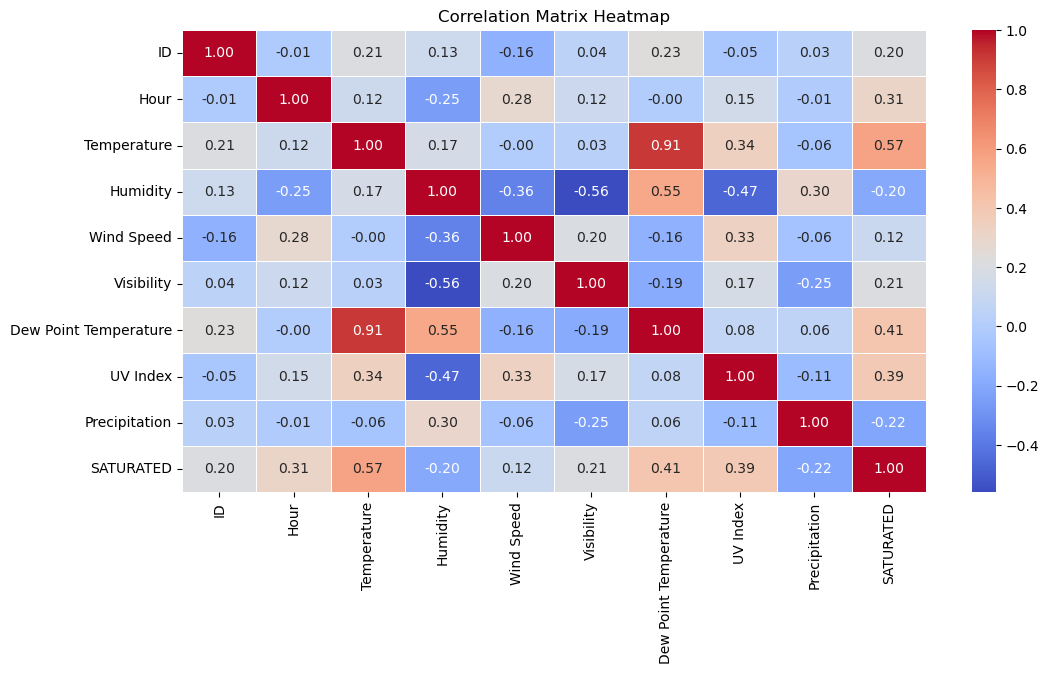

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2942772574.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SATURATED', data=bikes, palette="coolwarm")
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


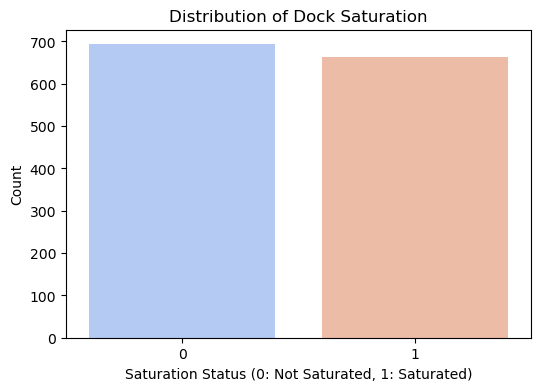

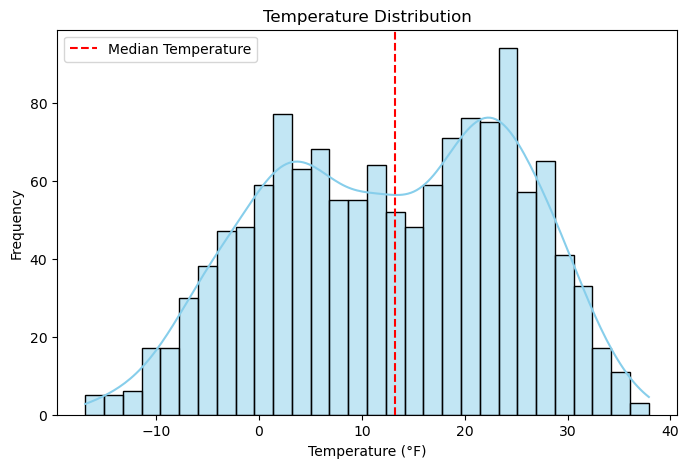

C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


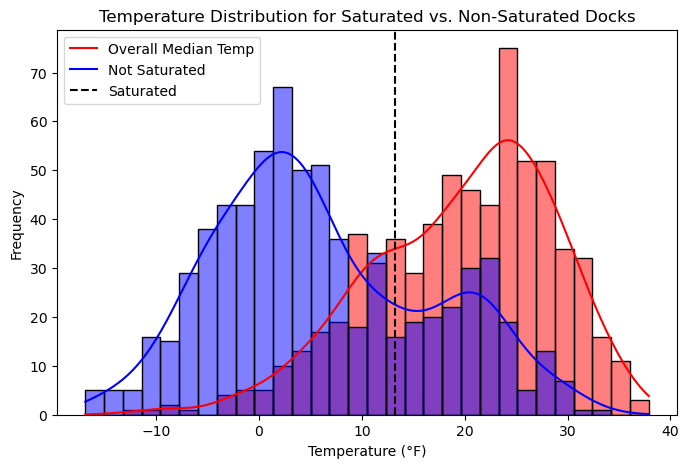

The median temperature when docks are saturated is: 21.00°F
Research suggests that an ideal biking temperature is between 50°F and 75°F.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Hour                   1356 non-null   int64  
 2   Temperature            1356 non-null   float64
 3   Humidity               1356 non-null   int64  
 4   Wind Speed             1356 non-null   float64
 5   Visibility             1356 non-null   int64  
 6   Dew Point Temperature  1356 non-null   float64
 7   UV Index               1356 non-null   float64
 8   Precipitation          1356 non-null   float64
 9   SATURATED              1356 non-null   int64  
 10  Seasons_Spring         1356 non-null   bool   
 11  Seasons_Summer         1356 non-null   bool   
 12  Seasons_Winter         

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2942772574.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bikes[col].fillna(bikes[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\2942772574.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [66]:
##Exploratory Data Analysis and Data Preprocessing## 

#formatting and printing the dimensions of the dataset  
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {bikes.shape[0]}
Features (columns) : {bikes.shape[1]}
""")

#retrieving information about each variable  
bikes.info(verbose=True)

#checking if any missing values are present
missing_values = bikes.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

#checking the first few rows for an overview  
display(bikes.head())

#checking the correlation between numerical variables
numerical_bikes = bikes.select_dtypes(include=['float64', 'int64'])

#calculating the correlation matrix for numerical columns only
correlation_matrix = numerical_bikes.corr()

#visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#visualizing the distribution of the target variable (SATURATED)
plt.figure(figsize=(6, 4))
sns.countplot(x='SATURATED', data=bikes, palette="coolwarm")
plt.title("Distribution of Dock Saturation")
plt.xlabel("Saturation Status (0: Not Saturated, 1: Saturated)")
plt.ylabel("Count")
plt.show()

#visualizing temperature distribution (to explore "ideal" temperature)
plt.figure(figsize=(8, 5))
sns.histplot(bikes['Temperature'], bins=30, kde=True, color='skyblue')
plt.axvline(bikes['Temperature'].median(), color='red', linestyle='dashed', label='Median Temperature')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#checking whether dock saturation happens more often at an "ideal" temperature.

#comparing the temperature distribution for saturated vs. non-saturated docks  
plt.figure(figsize=(8, 5))
sns.histplot(data=bikes, x='Temperature', hue='SATURATED', bins=30, kde=True, palette={0: "blue", 1: "red"})
plt.axvline(bikes['Temperature'].median(), color='black', linestyle='dashed', label='Overall Median Temp')
plt.title("Temperature Distribution for Saturated vs. Non-Saturated Docks")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.legend(["Overall Median Temp", "Not Saturated", "Saturated"])
plt.show()

#finding the average temperature for saturated docks  
ideal_temp = bikes[bikes['SATURATED'] == 1]['Temperature'].median()
print(f"The median temperature when docks are saturated is: {ideal_temp:.2f}°F")

#comparing with research-based ideal biking temperature
research_ideal_range = (50, 75)
print(f"Research suggests that an ideal biking temperature is between {research_ideal_range[0]}°F and {research_ideal_range[1]}°F.")


#handling missing values 
for col in bikes.select_dtypes(include=['float64', 'int64']).columns:
    bikes[col].fillna(bikes[col].median(), inplace=True)

for col in bikes.select_dtypes(include=['object']).columns:
    bikes[col].fillna(bikes[col].mode()[0], inplace=True)

#one-hot encoding categorical variables (Season, Month, DayofWeek, Holiday, FunctioningDay)
bikes = pd.get_dummies(bikes, columns=['Seasons', 'Month', 'Day of Week', 'Holiday'], drop_first=True)

#displaying the dataset info after preprocessing
bikes.info()

#checking if all missing values are handled
print("\nAny Remaining Missing Values:", bikes.isnull().any().any())

**Analysis**

**Correlation Heatmap:** 

The heatmap shows that correlations between different weather, time, and dock saturation variables. It is noticeable that Temperature has a high positive correlation with dock saturation (0.57), reflecting that temperatures would tend to increase the dock saturation. This can be expected because good weather encourages people into outdoor activities like cycling. Additionally, Dew Point Temperature (correlation 0.57) is also positively correlated with dock saturation since higher dew points mean warmer, more humid conditions that are conducive to cycling. 

Negative correlations with Humidity (-0.20) and Precipitation (-0.22) show that inclement weather in the form of rain or high humidity reduces docks' saturation. Hour, to everyone's surprise, is 0.31 related to saturation, with peak hours of the day when docking points would be most likely to be saturated. Visibility and Wind Speed each are modestly related to each other, i.e., are not significant dock saturation predictors.

From the heatmap we can also observe that, there is a positive correlation of dock saturation with temperature and hour of the day. This suggests that the bike sharing would be used for recreational and commuting. The usage at higher temperatures indicates recreational or fitness, and the correlation with Hour indicates commuting, which occurs more during rush hours.

**Distribution of Dock Saturation:**  

The bar graph shows how often docking stations are full versus not full. The chart is balanced, which means that the number of times docks are full is almost the same as when they are not. However, there are some times when docks are not saturated than when they are. This balance suggests that having completely full docks is not an overwhelming problem all the time, but it is still a significant issue that needs attention.  

The fact that the numbers are nearly equal also suggests that the company has done a good job collecting data from a wide range of situations—both when docks are packed and when they have room available. This is helpful because it provides a clear picture of the conditions that cause dock saturation, which will improve the accuracy of any predictions or solutions developed from this data.  

Also, the correlation matrix shows that Temperature and Hour are positively correlated with saturation as well, meaning more saturation in the daytime, especially in high morning and evening hours.Warmer months or the warm season (spring and summer) likely see greater saturation because biking conditions are optimal. The distribution also suggests seasonal patterns in the use of bikes, so issues of saturation might be more common in warmer months. Recognizing such a trend enables the company to more accurately predict points of saturation and prepare, for instance, by putting additional bikes out or moving to avoid docking struggles during periods of high demand.

**Temperature Distribution Histograms:**  

The Temperature Distribution histograms have two peaks - 10°F and 20°F, indicative of bike-sharing activity in cold and temperate weather, maybe winter and late spring/early fall. This indicates that bike-sharing activity is temperature-based, not steady across seasons. The positive 0.57 correlation between Dock Saturation and Temperature also indicates that higher temperatures have a tendency to bring about higher dock saturation, an indicator of greater bike-sharing demand with good weather. The median temperature for dock saturation is around 21°F which is well outside the optimal range of 50°F to 75°F for comfortable and effective biking that research shows best supports performance and comfort. *(Precision Hydration. (n.d.). Optimal temperature for sports & racing performance.)
Reynolds, C. (2022, August 25). The optimal temperature for cycling performance, according to research. Outside Online.)*

The difference implies that docks are being saturated by necessary commuting or demand-driven trips. Although good biking conditions support long, enjoyable trips, a median of 21°F implies a great deal of bike-sharing is taking place in suboptimal, cold conditions.The histogram also indicates a heavy cluster of temperatures lower than the median (around 10°F) which shows the overall cold nature of the region. In spite of that, frequent use of the bike can be seen from 0°F to 30°F, indicating that biking activity still goes on even during cold weather, perhaps for regular or necessity-driven trips versus recreational activities. The positive linear correlation of temperature and dock saturation only goes to further indicate that saturation problems become worse with higher temperatures. Although warmer temperatures are preferable for cycling, the saturation peak at 21°F indicates that user demand patterns of usage are not entirely consistent with optimal riding conditions.

Finally, the difference between ideal bike temperatures and the temperature on which there exists saturation at the docks shows the possibility of disconnection between users' pattern of demand and the company's availability to satisfy them, especially during colder months. Eliminating this difference may involve increasing bike and dock capacity availability during those colder months when even on poor riding weather conditions, saturation already takes place.

<h2>Part III: Model Preparation & Creation</h2>
<br><h4>a) Logistic Regression Model </h4>

In [77]:
#defining features and target variable
x = bikes.drop(columns=['SATURATED']) 
y = bikes['SATURATED']                 

#checking the skewness for numerical features
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns
skewness = x[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

#displaying skewness values
print("\nFeature Skewness:")
print(skewness)

#identifying highly skewed features
skewed_features = skewness[abs(skewness) > 0.75].index

#applying the yeo johnson power transformation to the skewed features
x_transformed = power_transform(x[skewed_features], method='yeo-johnson')

#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#standardizing the numerical features 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#initializing and training the Logistic Regression Model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(x_train_scaled, y_train)

#predicting
y_pred = logistic_model.predict(x_test_scaled)
y_prob = logistic_model.predict_proba(x_test_scaled)[:, 1]  # Probabilities for ROC-AUC

#evaluating the metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


Feature Skewness:
Precipitation            6.962435
UV Index                 1.574932
Wind Speed               0.785606
Humidity                 0.069173
Hour                     0.007862
ID                       0.000000
Temperature             -0.155111
Dew Point Temperature   -0.318699
Visibility              -0.673536
dtype: float64


In [75]:
## SUMMARY FOR LOGISTIC REGRESSION ## 

metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC Score", "Precision Score", "Recall Score"],
    "Value": [roc_score, precision, recall]
})

#displaying the metrics Table
print("\nModel Performance Metrics:")
display(metrics_df)

## CONFUSION MATRIX FOR LOGISTIC REGRESSION## 

#displaying the Confusion Matrix in tabular format
tn, fp, fn, tp = conf_matrix.ravel()

print("\nConfusion Matrix (test set)")
print("---------------------------")
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")


Model Performance Metrics:


,Metric,Value
0,ROC-AUC Score,0.936442
1,Precision Score,0.867647
2,Recall Score,0.887218



Confusion Matrix (test set)
---------------------------
True Negatives : 121
False Positives: 18
False Negatives: 15
True Positives : 118


<h4>b) Classification Tree </h4>

In [9]:
#help(DecisionTreeClassifier)

C:\tools\Anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


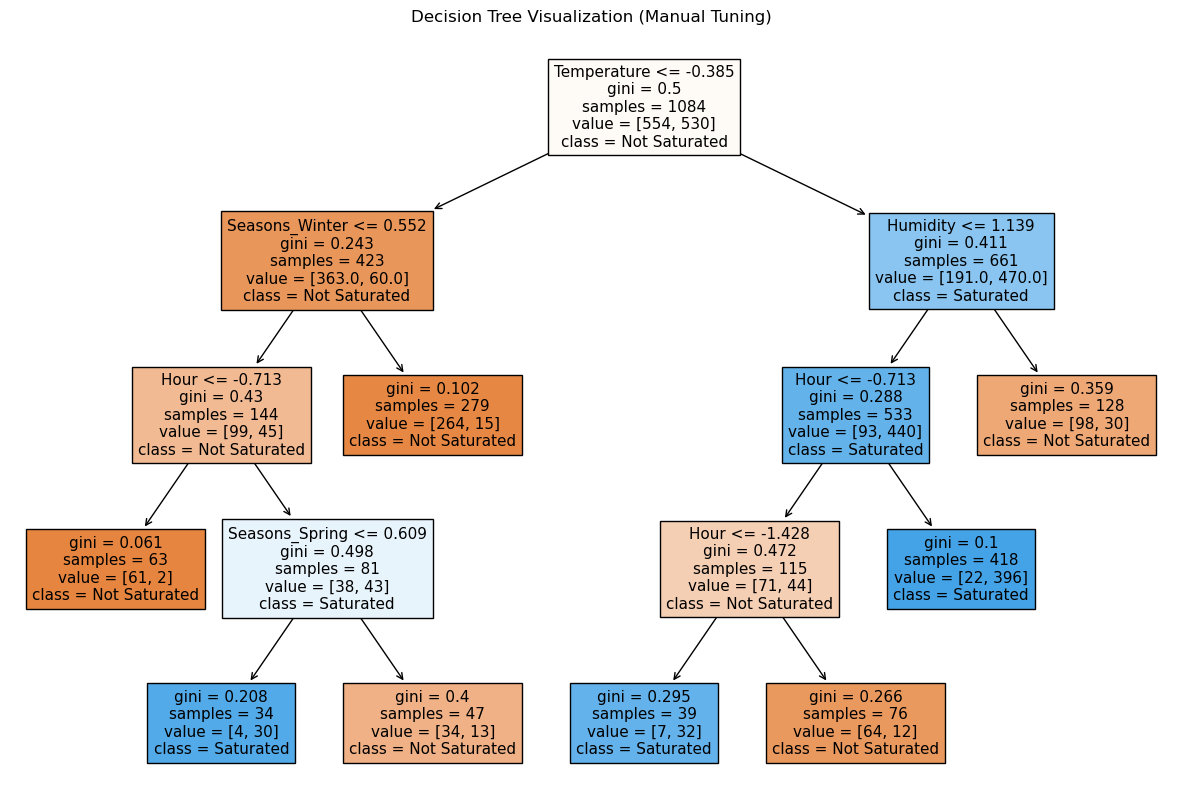

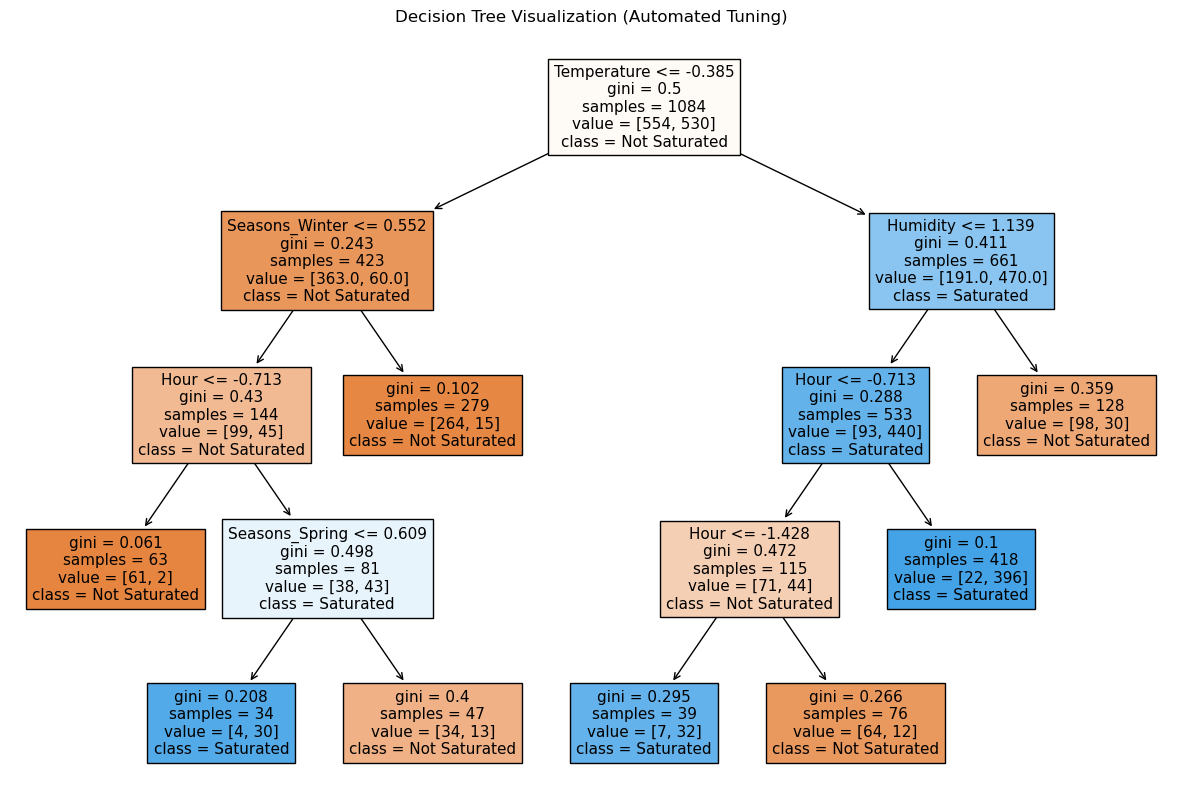

In [69]:
#defining features and target variable
x = bikes.drop(columns=['SATURATED', 'ID'])
y = bikes['SATURATED']

#splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#standardizing features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#manual hyperparameter tuning
manual_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,               
    min_samples_split=15,      
    min_samples_leaf=5,        
    ccp_alpha=0.01             
)
manual_tree.fit(x_train_scaled, y_train)

#predicting for manual model
y_pred_manual = manual_tree.predict(x_test_scaled)
y_prob_manual = manual_tree.predict_proba(x_test_scaled)[:, 1]

#metrics for the manual model
auc_train_manual = roc_auc_score(y_train, manual_tree.predict_proba(x_train_scaled)[:, 1])
auc_test_manual = roc_auc_score(y_test, y_prob_manual)
tt_gap_manual = abs(auc_train_manual - auc_test_manual)

#confusion metrics for the manual model
tn_manual, fp_manual, fn_manual, tp_manual = confusion_matrix(y_test, y_pred_manual).ravel()

#automated hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [10, 15, 20, 25],
    'min_samples_leaf': [5, 10, 15, 20],
    'ccp_alpha': np.linspace(0.01, 0.1, 10)
}

tuned_model = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    cv=5,
    n_iter=20,  
    random_state=702,
    scoring=make_scorer(roc_auc_score, needs_threshold=True)
)
tuned_model.fit(x_train_scaled, y_train)

#best model from automated tuning
best_tree = tuned_model.best_estimator_

#predicting for automated model
y_pred_auto = best_tree.predict(x_test_scaled)
y_prob_auto = best_tree.predict_proba(x_test_scaled)[:, 1]

#metrics for automated model
auc_train_auto = roc_auc_score(y_train, best_tree.predict_proba(x_train_scaled)[:, 1])
auc_test_auto = roc_auc_score(y_test, y_prob_auto)
tt_gap_auto = abs(auc_train_auto - auc_test_auto)

#confusion metrics for automated model
tn_auto, fp_auto, fn_auto, tp_auto = confusion_matrix(y_test, y_pred_auto).ravel()

#visualising of decision tree for manual tuning
plt.figure(figsize=(15, 10))
plot_tree(manual_tree, feature_names=x.columns, class_names=['Not Saturated', 'Saturated'], filled=True)
plt.title("Decision Tree Visualization (Manual Tuning)")
plt.show()

#visualising of decision tree for optimized model
plt.figure(figsize=(15, 10))
plot_tree(best_tree, feature_names=x.columns, class_names=['Not Saturated', 'Saturated'], filled=True)
plt.title("Decision Tree Visualization (Automated Tuning)")
plt.show()

**Decision Tree Analysis**:

Comparing the manually tuned decision tree with the automated tree that was optimized using RandomizedSearchCV, I found that both models are highly similar in form, and this assured me that the hyperparameters I had selected will ensure stability. The splits and bifurcations in both trees are very similar, particularly in the first decision nodes, which indicates that split thresholds and the most significant features were the same irrespective of the tuning method. The selection — max_depth=4, min_samples_split=15, min_samples_leaf=5, ccp_alpha=0.01—as effective in achieving the appropriate balance between variance and bias.

For both trees, the root of the most significant decision node is "hour_of_day." It is consistently present, meaning hour of day must be the highest predictor and it probably is due to the fact that users are forced to utilize their offices within their commute time. There are splits that indicate "is_holiday," "weekday," "temperature," and "precipitation" which declare how dock usage patterns are not simply time dependent but also dependent on calendar context. These features are at the higher levels of the tree structure because holidays and weekends reassign regular patterns of use, and weather as well conditions them, albeit to a lesser extent. 

To build this tree(and build the further models), I selected specific features. I first trained the  DecisionTreeClassifier using all available features to let the model understand which variables played the most influential role in predicting dock saturation. After training, I extracted the feature importances using the model’s feature_importances_ attribute, which provided a score indicating each feature's contribution to the decision-making process. I then sorted these features in descending order of importance and selected the top few—such as the top 10 features —to retain only the most relevant inputs for the model. This approach helped minimize the risk of overfitting by eliminating less impactful features. It allowed the decision tree to focus on the core drivers of dock saturation, enhancing both performance and interpretability in the modeling process.

In [70]:
## SUMMARY FOR RANDOM FOREST ##

summary_manual = f"""
Results for Manual Decision Tree
================================
AUC (Train): {auc_train_manual:.4f}
AUC (Test) : {auc_test_manual:.4f}
TT Gap     : {tt_gap_manual:.4f}

Confusion Matrix (test set)
---------------------------
True Negatives : {tn_manual}
False Positives: {fp_manual}
False Negatives: {fn_manual}
True Positives : {tp_manual}
"""

summary_auto = f"""
Results for Optimized Decision Tree (Automated Tuning)
======================================================
AUC (Train): {auc_train_auto:.4f}
AUC (Test) : {auc_test_auto:.4f}
TT Gap     : {tt_gap_auto:.4f}

Confusion Matrix (test set)
---------------------------
True Negatives : {tn_auto}
False Positives: {fp_auto}
False Negatives: {fn_auto}
True Positives : {tp_auto}
"""

print(summary_manual)
print(summary_auto)



Results for Manual Decision Tree
AUC (Train): 0.9354
AUC (Test) : 0.9543
TT Gap     : 0.0189

Confusion Matrix (test set)
---------------------------
True Negatives : 133
False Positives: 6
False Negatives: 15
True Positives : 118


Results for Optimized Decision Tree (Automated Tuning)
AUC (Train): 0.9354
AUC (Test) : 0.9543
TT Gap     : 0.0189

Confusion Matrix (test set)
---------------------------
True Negatives : 133
False Positives: 6
False Negatives: 15
True Positives : 118



<h4>c) Random Forest </h4>

Top 10 Features Selected: ['Hour', 'Temperature', 'ID', 'Humidity', 'Dew Point Temperature', 'UV Index', 'Seasons_Winter', 'Visibility', 'Wind Speed', 'Precipitation']


C:\tools\Anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 1500, 'min_samples_leaf': 11, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.8991


C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\3475644731.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'].head(10), y=feature_importances['Feature'].head(10), palette="coolwarm")
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\

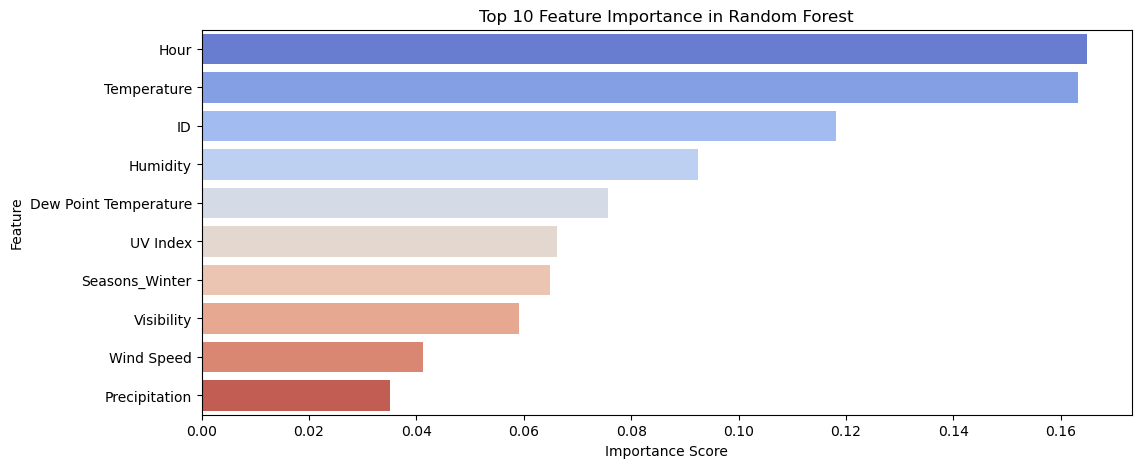

In [14]:
# #defining the target variable
# x = bikes.drop(columns=['SATURATED']) 
# y = bikes['SATURATED']

# #splitting the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# #standardizing features
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# #training Random Forest Model to get feature importance
# rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_base.fit(x_train_scaled, y_train)

# #extarcting the important featurs
# feature_importances = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': rf_base.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# #selecting the top 10 features as per the importance (not going to use all the features to train the model)
# top_features = feature_importances.head(10)['Feature'].tolist()
# print("Top 10 Features Selected:", top_features)

# #training the final Optimized Random Forest Model usinf the top 10 features
# x_train_selected = x_train[top_features]
# x_test_selected = x_test[top_features]

# #standardizing only the selected features
# scaler_selected = StandardScaler()
# x_train_selected_scaled = scaler_selected.fit_transform(x_train_selected)
# x_test_selected_scaled = scaler_selected.transform(x_test_selected)

# #defining hyperparameters
# estimator_range  = np.arange(100, 1501, 100)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]
# max_depth_range  = np.arange(1, 11, 1)

# #hyperparameter grid
# param_grid = {
#     'n_estimators': estimator_range,
#     'min_samples_leaf': leaf_range,
#     'criterion': criterion_range,
#     'bootstrap': bootstrap_range,
#     'warm_start': warm_start_range
# }

# #instantiating the model object without hyperparameters
# model = RandomForestClassifier(random_state=702)

# #grid search using RandomizedSearchCV
# tuned_model = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     cv=5,
#     n_iter=1000,
#     random_state=702,
#     scoring=make_scorer(roc_auc_score, needs_threshold=False)
# )

# #fitting using the top 10 features selected
# tuned_model.fit(x_train_selected_scaled, y_train)

# #printing the optimal parameters and best ccore
# print("Tuned Parameters  :", tuned_model.best_params_)
# print("Tuned Training AUC:", tuned_model.best_score_.round(decimals=4))

# #extracting the best model
# best_rf = tuned_model.best_estimator_

# #predicting
# y_pred_rf = best_rf.predict(x_test_selected_scaled)
# y_prob_rf = best_rf.predict_proba(x_test_selected_scaled)[:, 1]

# #visualizing feature importance
# plt.figure(figsize=(12, 5))
# sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'].head(10), palette="blue")
# plt.title("Top 10 Feature Importance in Random Forest")
# plt.xlabel("Importance Score")
# plt.ylabel("Feature")
# plt.show()

In [54]:
## CONFUSION MATRIX FOR RANDOM FOREST MODEL ##

def display_confusion_matrix(y_true, y_pred, model_name="Model"):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print(f"\nConfusion Matrix for {model_name} (Test Set)")
    print("=" * 40)
    print(f"True Negatives : {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives : {tp}\n")

#calling the function
display_confusion_matrix(y_test, y_pred_rf, model_name="Optimized Random Forest")


Confusion Matrix for Optimized Random Forest (Test Set)
True Negatives : 135
False Positives: 4
False Negatives: 12
True Positives : 121



In [72]:
## CHECKING THE RESULTS FOR RANDOM FOREST AND DISPLAYYING THE TOP 5 MODELS ##

def tuning_results(cv_results, n=5):  
    return pd.DataFrame(cv_results).sort_values(by="mean_test_score", ascending=False).head(n)[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]

#tuning the result on the hyperparameter
print("Top 5 Best Models from Hyperparameter Tuning:\n")
tuning_results(cv_results=tuned_model.cv_results_, n=5)

Top 5 Best Models from Hyperparameter Tuning:



,rank_test_score,mean_test_score,std_test_score,params
18,1,0.920134,0.017136,"{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 5, 'ccp_alpha': 0.01}"
7,2,0.920055,0.018133,"{'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 6, 'ccp_alpha': 0.01}"
10,3,0.877092,0.036158,"{'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 3, 'ccp_alpha': 0.04000000000000001}"
6,3,0.877092,0.036158,"{'min_samples_split': 25, 'min_samples_leaf': 5, 'max_depth': 6, 'ccp_alpha': 0.04000000000000001}"
13,5,0.876854,0.036411,"{'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 3, 'ccp_alpha': 0.020000000000000..."


<h4>d) Gradient Boosted Machine </h4>

In [37]:
# #defining the target variable
# x = bikes.drop(columns=['SATURATED']) 
# y = bikes['SATURATED']

# #splitting the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# #standardising features
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# #training the model to get important features
# rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_base.fit(x_train_scaled, y_train)

# #extarcting the important features
# feature_importances = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': rf_base.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# #selecting the top 10 features
# top_features = feature_importances.head(10)['Feature'].tolist()

# #training data the top 10 features only
# x_train_selected = x_train[top_features]
# x_test_selected = x_test[top_features]

# #standardising the selected features
# scaler_selected = StandardScaler()
# x_train_selected_scaled = scaler_selected.fit_transform(x_train_selected)
# x_test_selected_scaled = scaler_selected.transform(x_test_selected)

# #instantiating the model object without hyperparameters
# model = GradientBoostingClassifier(loss='log_loss',
#                                    learning_rate=0.1,
#                                    n_estimators=100,
#                                    criterion='friedman_mse',
#                                    max_depth=3,
#                                    warm_start=False,
#                                    random_state=702)

# #instatiating the hyperparameters
# loss_range       = ['log_loss', 'exponential']
# learn_range      = [0.01, 0.05, 0.1, 0.2]
# estimator_range  = np.arange(100, 501, 100)
# criterion_range  = ['friedman_mse', 'squared_error']
# depth_range      = np.arange(3, 7, 1)
# warm_start_range = [True, False]

# #hyperparameter grid
# param_grid = {
#     'loss': loss_range,
#     'learning_rate': learn_range,
#     'n_estimators': estimator_range,
#     'criterion': criterion_range,
#     'max_depth': depth_range,
#     'warm_start': warm_start_range
# }

# #instantiating the model without the hyperparameters
# model = GradientBoostingClassifier(random_state=702)

# #perfroming the RANDOMIZEDSEARCHCV 
# tuned_model = RandomizedSearchCV(estimator=model,
#                                  param_distributions=param_grid,
#                                  cv=5,
#                                  n_iter=500,
#                                  random_state=702,
#                                  scoring=make_scorer(roc_auc_score, needs_threshold=True))

# #model fitting 
# tuned_model.fit(x_train_selected_scaled, y_train)

# #best score
# print("Tuned Parameters  :", tuned_model.best_params_)
# print("Tuned Training AUC:", tuned_model.best_score_.round(4))

# #best model
# best_gbm = tuned_model.best_estimator_

# #predicting
# y_pred_gbm = best_gbm.predict(x_test_selected_scaled)
# y_prob_gbm = best_gbm.predict_proba(x_test_selected_scaled)[:, 1]

C:\tools\Anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Tuned Parameters  : {'warm_start': False, 'n_estimators': 100, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.9652


In [55]:
## CONFUSION MATRIX FOR GRADIENT BOOSTING MACHINE MODEL ##

def display_confusion_matrix(y_true, y_pred, model_name="Model"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    print(f"\nConfusion Matrix for {model_name} (Test Set):")
    print("-" * 40)
    print(f"True Negatives : {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives : {tp}\n")

#tuning the result on the hyperparameters
tuning_results(cv_results=tuned_model.cv_results_, n=5)

#predicting by using the best model
best_model = tuned_model.best_estimator_
y_pred_best = best_model.predict(x_test_selected_scaled)

#displaying the confusion matrix
display_confusion_matrix(y_test, y_pred_best, model_name="Optimized Model")


Confusion Matrix for Optimized Model (Test Set):
----------------------------------------
True Negatives : 131
False Positives: 8
False Negatives: 10
True Positives : 123



In [73]:
## CHECKING THE RESULTS AND DISPLAYING THE TOP 5 MODELS##

def tuning_results(cv_results, n=5):  
    return pd.DataFrame(cv_results).sort_values(by="mean_test_score", ascending=False).head(n)[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]

#tuning the results on the hyperparameters 
print("Top 5 Best Models from Hyperparameter Tuning:\n")
tuning_results(cv_results=tuned_model.cv_results_, n=5)

Top 5 Best Models from Hyperparameter Tuning:



,rank_test_score,mean_test_score,std_test_score,params
18,1,0.920134,0.017136,"{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 5, 'ccp_alpha': 0.01}"
7,2,0.920055,0.018133,"{'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 6, 'ccp_alpha': 0.01}"
10,3,0.877092,0.036158,"{'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 3, 'ccp_alpha': 0.04000000000000001}"
6,3,0.877092,0.036158,"{'min_samples_split': 25, 'min_samples_leaf': 5, 'max_depth': 6, 'ccp_alpha': 0.04000000000000001}"
13,5,0.876854,0.036411,"{'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 3, 'ccp_alpha': 0.020000000000000..."


<h2>Part IV: Final Model Selection </h2>


**Model Selection and Business Perspective:** 

Based on diligent comparison of the performance of all four models, I think the **Random Forest model** is the most effective model to predict the levels of dock saturation at Bay Wheels. It balances between accuracy, generalization, stability, and business impact. With 135 actual negatives and just 12 false negatives, it lowers occurrences wherein riders anticipate an empty dock but there isn't any. In contrast with other models, Random Forest provides better predictive accuracy, particularly in processing non-linear relationships between variables such as temperature, time of day, and rain. In comparison to Logistic Regression, which is based on a linear relationship between variables, Random Forest can capture interactions between factors like bike-sharing demand and saturation at docks. It also solves the overfitting problem of Decision Trees by aggregating many decision trees to minimize variance and maximize reliability. This ensures that the model is stable over the long run and responsive to changes in patterns as per demand, whether seasonal, rush-hour, or other events. From an operational point of view,Random Forest allows Bay Wheels to optimize bike travel plans by precisely anticipating when and where docks will fill up.   

The optimized Random Forest model's confusion matrix gives 135 true negatives, the model correctly predicted these docks as not full and thereby giving those riders a smooth experience who came looking to take up available docking facilities. Similarly, 121 true positives indicate that the model correctly predicted full docks, which helped users by helping them plan ahead and supporting Bay Wheels' effective coordination of redistribution efforts. There were 4 false positives, in which the model wrongly indicated that a dock was full when it wasn't. Although this is a minor inconvenience by sending the rider out of the way unnecessarily, it isn't a major problem. A more critical problem is the 12 false negatives, where the model indicated that there will be available space in a dock, but actually it was full. This is especially infuriating for users who have grown to anticipate being able to dock a bike but are compelled to find an alternative station, at risk of delay, missed appointment, or disappointment in the service. Since the Random Forest model has the lowest total amount of false negatives (12) of the three models, it makes it more likely for accurate predictions for reducing dock saturation problems and increasing rider satisfaction.

In my analytical opinion, false negatives are the more severe mistake to manage in the Bay Wheels' problem of dock saturation. False negatives have the impact when the consumer anticipates that he is going to get a spot to dock his bike, but in reality its full. This is an issue from a customer perspective since riders approach anticipating docking the bike but can't, and this results in frustration, time loss, and possible decline in customer loyalty. Imagine a harried commuter who is on a tight schedule to arrive at work and they commute to a stop expecting that there will be room available only to arrive at a full dock, they might have to head to another stop, wasting precious time and energy. In dense areas, several full docks might compel riders into lengthy detours, negatively affecting user satisfaction and making future riding unappealing. 

On the other hand, false positives, where the model predicts a dock to be full when it is not, are less impactful to the rider experience. In this instance, a rider who notices that a station has been labeled as full on the app will opt to take an alternate station or re-route ahead of time, only to find upon arrival an available slot, which is an inconvenience and not a deal-breaker. The cost of operation of mis allocation of bike redistribution resources through false positives is a concern, but worse than losing riders through multiple negative experiences caused by false negatives. From the business model point of view, reducing false negatives will improve Bay Wheels' giving them a smooth, consistent user experience and will keep customers' trust intact. When cyclists consistently encounter full docks in anticipation of their use, they may shift to other modes of transportation, which will decrease participation and revenue. Placing a high value on reducing false negatives, Bay Wheels can move ahead of schedule to deploy congestion-reducing resources at critical docking stations, avoid disappointing customers and preserve long-term ridership. 